Title: Predicting Heart Disease Using K-nearest Neighbour Classification Algorithm

Introduction:
Heart disease is a leading cause of death worldwide. This project seeks to answer the question: "Can we use k-nearest neighbour classification algorithm techniques to predict the presence of heart disease in a patient based on various health indicators?" We plan to use the Cleveland Heart Disease Database from the UCI Machine Learning Repository. This database includes 303 instances and 14 attributes, including demographic, symptom, and test result data. However, we will focus on: age, chest pain type, resting blood pressure, serum cholesterol, fasting blood sugar, resting EKG results, maximum heart rate achieved, exercise-induced angina, ST depression induced by exercise, slope of the peak exercise ST segment, number of major vessels colored by fluoroscopy, thalassemia, and diagnosis of heart disease. These attributes are important factors which may relate to the heart-disease.

In [3]:
library(tidyverse)
library(repr)
library(tidymodels)
options(repr.matrix.max.rows = 6)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0     ✔ yardstick    1.0.0
✔ recipes      1.0.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks r

In [4]:
heart_disease<- read_csv(file = "https://raw.githubusercontent.com/Chr1zz-D/dsci-100-demo/main/heart-disease.csv")
heart_disease <- mutate(heart_disease, cp= as_factor(cp))
heart_disease_scaled<-heart_disease |>
mutate (scaled_chol= scale(chol, center= TRUE),
       scaled_oldpeak= scale(oldpeak, center=TRUE),
       scaled_thalach=scale(thalach, center= TRUE) )

heart_disease_scaled

Rows: 303 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (14): age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpea...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,scaled_chol,scaled_oldpeak,scaled_thalach
<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,"<dbl[,1]>","<dbl[,1]>","<dbl[,1]>"
63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,-0.25591036,1.0855423,0.01541728
37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,0.07208025,2.1190672,1.63077374
41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,-0.81542377,0.3103986,0.97589950
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
68,1,0,144,193,1,1,141,0,3.4,1,2,3,0,-1.0276530,2.0329402,-0.3775073
57,1,0,130,131,0,1,115,1,1.2,1,1,3,0,-2.2238541,0.1381444,-1.5126226
57,0,1,130,236,0,0,174,0,0.0,1,1,2,0,-0.1980297,-0.8953805,1.0632161


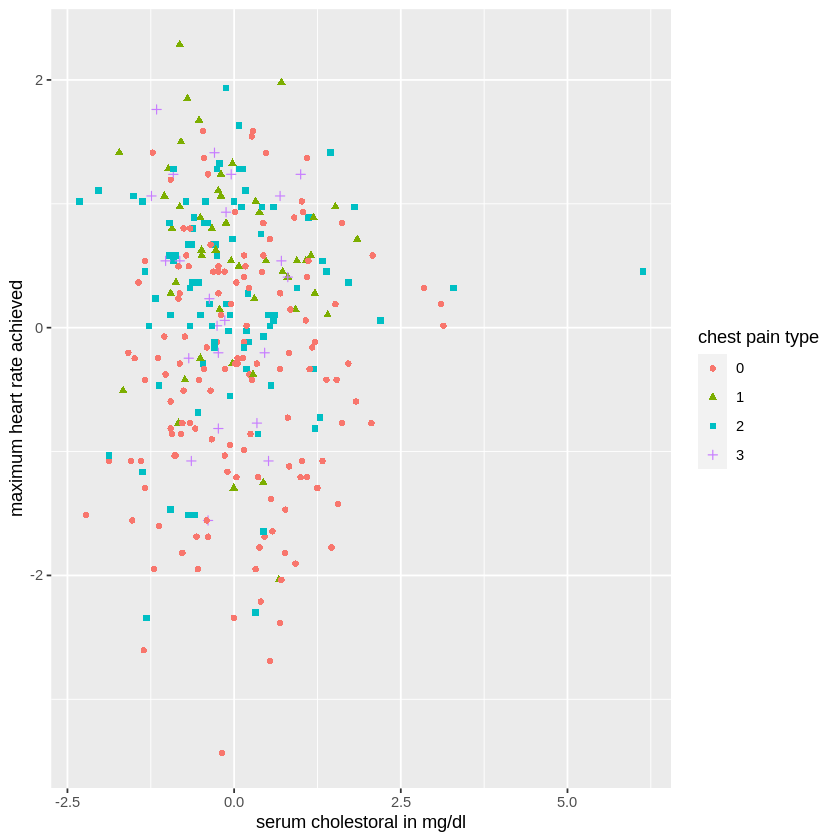

In [17]:
thalach_vs_chol_plot <- ggplot(heart_disease_scaled, aes(x=scaled_chol, y=scaled_thalach,color=cp, shape=cp)) + geom_point() +
labs(x="serum cholestoral in mg/dl",y="maximum heart rate achieved", shape="chest pain type",color="chest pain type")
thalach_vs_chol_plot

In [13]:
heart_disease_split <- initial_split(heart_disease, prop = 0.5, strata = cp)  
heart_disease_train <- training(heart_disease_split)   
heart_disease_test <- testing(heart_disease_split) 
heart_disease_train
heart_disease_test

age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
69,0,3,140,239,0,1,151,0,1.8,2,2,2,1
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
69,1,2,140,254,0,0,146,0,2.0,1,3,3,0
59,1,2,126,218,1,1,134,0,2.2,1,1,1,0
67,1,2,152,212,0,0,150,0,0.8,1,0,3,0


age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
63,1,0,140,187,0,0,144,1,4.0,2,2,3,0
57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [14]:
heart_disease_recipe <- recipe(cp ~ chol + thalach , data = heart_disease_train) |>
step_scale(all_predictors()) |>
step_center(all_predictors()) 
heart_disease_recipe

Recipe

Inputs:

      role #variables
   outcome          1
 predictor          2

Operations:

Scaling for all_predictors()
Centering for all_predictors()

In [15]:
number_of_rows <- nrow(heart_disease_train) 
number_of_rows

[1] 151

In [16]:
counts<- heart_disease_train |> group_by(cp)|>
summarize(count=n())
counts

cp,count
<fct>,<int>
0,66
1,23
2,44
3,18


Methods:
We use functions from the tidyverse library to process the data frames and Tibbles. repr is used to resize the plots in this notebook, such as 
the "accuracy vs. K" plot. Also, we use the tidymodels library to streamline machine learning workflows. By further entering the data, we focused on 
(age, type of chest pain, resting blood pressure, serum cholesterol, fasting glucose, resting ECG results, maximum heart rate achieved, exercise-induced angina, 
exercise-induced ST-segment depression, slope of peak ST-segment on exercise, number of significant vessels coloured by fluoroscopy, diagnosis of thalassemia and heart 
disease) we could further filter out the eligible. Then we can try to filter out people diagnosed with "heart disease" according to the 
k-nearest neighbour classification algorithm and compare it with the fact (whether the diagnosis is heart disease) to verify the feasibility of this function. Thus we have a new filtered dataset with the listed essential columns. To combine our datasets(standard and listed), we used brand, which combines the rows from the standard dataset with those from the listed dataset. This process is similar to stacking datasets together. Then we make balancing the datasets; balancing data can also affect our classification model if a particular item is heavily overrepresented compared to other categories. After that, we will visualize to see which value of k will be optimal for our model. 


Expected outcomes and significance: From the predict model, predicting chest pain type based on maximum heart rate achieved(thalach）and serum cholesterol levels(chol) can provide valuable insights into determining the type of heart disease.   By utilizing accessible indexes, healthcare professionals can make informed decisions and provide appropriate care for patients.   Chest pain is a common symptom associated with various types of heart diseases.    It can indicate different underlying conditions, such as coronary artery disease, myocardial infarction (heart attack), or other cardiac abnormalities.    By predicting the chest pain type based on readily available measures such as maximum heart rate achieved, healthcare providers can gain initial insights into the potential heart disease diagnosis and guide further investigations.   For the future questions, we may include other accessible variables, such as age, smoking status, or family history of heart disease, could improve the accuracy and reliability of the prediction model.